In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from pyearth import Earth

In [4]:
m = 10000
n = 10
X = 80 * numpy.random.uniform(size=(m, n)) - 40
y = 100 * \
    (numpy.sin((X[:, 6])) - 4.0) + \
    10 * numpy.random.normal(size=m)


## Notice that the data is random... this is just a decision tree for memorizing patterns.... soo...

In [5]:
X.shape

(10000, 10)

In [6]:
y.shape

(10000,)

In [11]:
model = Earth(max_degree=3, minspan_alpha=.5, verbose=True)
model.fit(X, y)

Beginning forward pass
---------------------------------------------------------------------
iter  parent  var  knot  mse          terms  gcv       rsq    grsq   
---------------------------------------------------------------------
0     -       -    -     5197.436491  1      5198.476  0.000  0.000  
1     0       6    8938  5007.314680  3      5013.329  0.037  0.036  
2     2       6    3728  4778.713094  5      4789.244  0.081  0.079  
3     4       6    908   4559.413443  7      4574.039  0.123  0.120  
4     0       6    6101  4378.449121  9      4396.897  0.158  0.154  
5     7       6    5214  4178.580412  11     4200.394  0.196  0.192  
6     9       6    9504  3834.448626  13     3858.333  0.262  0.258  
7     0       6    2957  3718.066365  15     3744.982  0.285  0.280  
8     2       6    4875  3592.241611  17     3621.880  0.309  0.303  
9     15      6    6969  3432.129979  19     3463.925  0.340  0.334  
10    13      6    8848  3196.273609  21     3229.127  0.385  0.379

Earth(allow_linear=None, allow_missing=False, check_every=None,
   enable_pruning=True, endspan=None, endspan_alpha=None, fast_K=None,
   fast_h=None, feature_importance_type=None, max_degree=3, max_terms=None,
   min_search_points=None, minspan=None, minspan_alpha=0.5, penalty=None,
   smooth=None, thresh=None, use_fast=None, verbose=True, zero_tol=None)

In [13]:
print(model.summary())

Earth Model
------------------------------------------------------------------
Basis Function                               Pruned  Coefficient  
------------------------------------------------------------------
(Intercept)                                  No      -919842      
h(x6-37.2688)                                Yes     None         
h(37.2688-x6)                                No      -259.213     
h(x6-34.6665)*h(37.2688-x6)                  No      -92.8986     
h(34.6665-x6)*h(37.2688-x6)                  Yes     None         
h(x6-31.5559)*h(34.6665-x6)*h(37.2688-x6)    No      8.36854      
h(31.5559-x6)*h(34.6665-x6)*h(37.2688-x6)    Yes     None         
h(x6+37.1748)                                Yes     None         
h(-37.1748-x6)                               No      -45.179      
h(x6+30.3153)*h(x6+37.1748)                  No      -12.6221     
h(-30.3153-x6)*h(x6+37.1748)                 Yes     None         
h(x6+24.4166)*h(x6+30.3153)*h(x6+37.1748)    No   

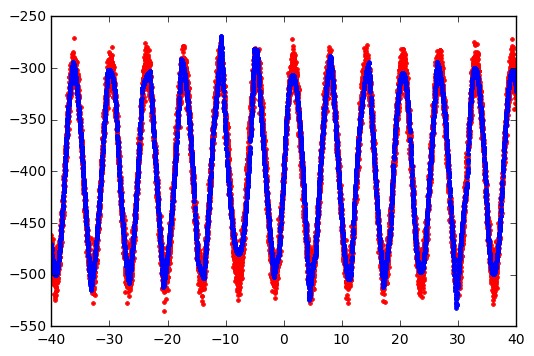

In [14]:
y_hat = model.predict(X)
plt.plot(X[:, 6], y, 'r.')
plt.plot(X[:, 6], y_hat, 'b.')
plt.show()